# Importing the relevant libraries


In [71]:
import pandas as pd 
import numpy as np 
%matplotlib inline




# Loading the dataset

In [72]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, drive
from oauth2client.client import GoogleCredentials
 
drive.mount('/content/drive')
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
#Reading the data
df =pd.read_csv('/content/drive/My Drive/ozone.csv')
print(df)

            Date WSR0 WSR1 WSR2 WSR3  ...     TT    SLP SLP_ Precp Result
0       1/1/1998  0.8  1.8  2.4  2.1  ...   17.9  10330  -55     0      0
1       1/2/1998  2.8  3.2  3.3  2.7  ...     29  10275  -55     0      0
2       1/3/1998  2.9  2.8  2.6  2.1  ...   41.3  10235  -40     0      0
3       1/4/1998  4.7  3.8  3.7  3.8  ...   51.7  10195  -40  2.08      0
4       1/5/1998  2.6  2.1  1.6  1.4  ...      ?      ?    ?  0.58      0
...          ...  ...  ...  ...  ...  ...    ...    ...  ...   ...    ...
2529  12/27/2004  0.3  0.4  0.5  0.5  ...   21.8  10295   65     0      0
2530  12/28/2004    1  1.4  1.1  1.7  ...   19.1  10310   15     0      0
2531  12/29/2004  0.8  0.8  1.2  0.9  ...   35.2  10275  -35     0      0
2532  12/30/2004  1.3  0.9  1.5  1.2  ...   34.2  10245  -30  0.05      0
2533  12/31/2004  1.5  1.3  1.8  1.4  ...  39.35  10220  -25     0      0

[2534 rows x 74 columns]


# Analysing the dataset

In [74]:
print("The shape is:{}".format(df.shape))
print("The first 10 samples are : \n{}".format(df.head(n=10)))
df.describe()

The shape is:(2534, 74)
The first 10 samples are : 
        Date WSR0 WSR1 WSR2 WSR3 WSR4  ...     KI     TT    SLP SLP_ Precp Result
0   1/1/1998  0.8  1.8  2.4  2.1    2  ...  -12.1   17.9  10330  -55     0      0
1   1/2/1998  2.8  3.2  3.3  2.7  3.3  ...  14.05     29  10275  -55     0      0
2   1/3/1998  2.9  2.8  2.6  2.1  2.2  ...   17.9   41.3  10235  -40     0      0
3   1/4/1998  4.7  3.8  3.7  3.8  2.9  ...  31.15   51.7  10195  -40  2.08      0
4   1/5/1998  2.6  2.1  1.6  1.4  0.9  ...      ?      ?      ?    ?  0.58      0
5   1/6/1998  3.1  3.5  3.3  2.5  1.6  ...  27.95  46.25  10120    ?  5.84      0
6   1/7/1998  3.7  3.2  3.8  5.1    6  ...  26.75  48.45  10040  -80  0.18      0
7   1/8/1998  2.2  2.9  3.4  4.2  4.7  ...  -10.1     42  10065   25     0      0
8   1/9/1998    1  1.5  1.2  1.2  0.7  ...   -3.4   32.9  10120   55     0      0
9  1/10/1998  0.9  0.6  0.5  0.5  0.6  ...   -7.9   30.5  10180   60     0      0

[10 rows x 74 columns]


,Result
count,2534.000000
mean,0.063141
std,0.243265
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [75]:
#Dropping unnecessary columns like date
df.drop(columns = 'Date', inplace = True)
df.head()
#Replacing missing values
df.replace(to_replace='?',value =np.nan, inplace =True)
df.head()


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), dtype='float64')
df.columns = ['WSR0','WSR1','WSR2','WSR3','WSR4','WSR5','WSR6','WSR7','WSR8','WSR9','WSR10','WSR11','WSR12','WSR13','WSR14','WSR15','WSR16','WSR17','WSR18','WSR19','WSR20','WSR21','WSR22','WSR23','WSR_PK','WSR_AV','T0','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16','T17','T18','T19','T20','T21','T22','T23','T_PK','T_AV','T85','RH85','U85','V85','HT85','T70','RH70','U70','V70','HT70','T50','RH50','U50','V50','HT50','KI','TT','SLP','SLP_','Precp','Result']
df.head()


,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,WSR10,WSR11,WSR12,WSR13,WSR14,WSR15,WSR16,WSR17,WSR18,WSR19,WSR20,WSR21,WSR22,WSR23,WSR_PK,WSR_AV,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T_PK,T_AV,T85,RH85,U85,V85,HT85,T70,RH70,U70,V70,HT70,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,2.8,2.6,5.5,3.1,5.2,6.1,6.1,6.1,6.1,5.6,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15.0,19.1,12.5,6.700000,0.11000,3.830000,0.140000,1612.00000,-2.300000,0.300000,7.180000,0.120000,3178.500000,-15.50000,0.150000,10.670000,-1.560000,5795.000000,-12.100000,17.900000,10330.000000,-55.000000,0.00,0.0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3.0,2.6,3.0,2.2,2.3,2.5,2.8,5.5,3.4,15.1,15.3,15.6,15.6,15.9,16.2,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16.0,16.2,22.4,17.8,9.000000,0.25000,-0.410000,9.530000,1594.50000,-2.200000,0.960000,8.240000,7.300000,3172.000000,-14.50000,0.480000,8.390000,3.840000,5805.000000,14.050000,29.000000,10275.000000,-55.000000,0.00,0.0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,3.1,4.0,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,4.1,4.6,5.6,3.5,16.6,16.7,16.7,16.8,16.8,16.8,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22.0,22.1,22.2,21.3,19.8,18.6,18.0,18.0,18.2,18.3,18.4,22.2,18.7,9.000000,0.56000,0.890000,10.170000,1568.50000,0.900000,0.540000,3.800000,4.420000,3160.000000,-15.90000,0.600000,6.940000,9.800000,5790.000000,17.900000,41.300000,10235.000000,-40.000000,0.00,0.0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.5,4.3,4.7,3.2,18.3,18.2,18.3,18.4,18.6,18.6,18.5,18.7,18.6,18.8,19.0,19.0,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,9.900000,0.89000,-0.340000,8.580000,1546.50000,3.000000,0.770000,4.170000,8.110000,3145.500000,-16.80000,0.490000,8.730000,10.540000,5775.000000,31.150000,51.700000,10195.000000,-40.000000,2.08,0.0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,2.2,2.0,3.0,3.0,3.1,3.1,2.7,3.0,2.4,2.8,2.5,2.5,3.7,3.4,3.7,2.3,18.8,18.6,18.5,18.5,18.6,18.9,19.2,19.4,19.8,20.5,21.1,21.9,23.8,25.1,25.8,26.0,25.6,24.2,22.9,21.6,20.0,19.5,19.1,19.1,26.0,21.1,13.575298,0.57732,2.136487,1.662464,1531.49426,5.931129,0.406445,5.459634,0.994001,3145.420501,-10.51141,0.304716,9.872418,0.830116,5818.821222,10.511051,37.388335,10164.198442,-0.119949,0.58,0.0


In [76]:
#Checkking if all the Nan values are gone or not
for column in df:
  if np.nan in df[column].values:
    print("There are nan values")
  else:
    print("All the nan values are gone")
  

All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values are gone
All the nan values a

# Splitting the dataset into testing and training datasets

In [77]:


# Splitting the dataset into feature(X) and target(Y)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(y)
print(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =0)

[0. 0. 0. ... 0. 0. 0.]
[[ 8.0000e-01  1.8000e+00  2.4000e+00 ...  1.0330e+04 -5.5000e+01
   0.0000e+00]
 [ 2.8000e+00  3.2000e+00  3.3000e+00 ...  1.0275e+04 -5.5000e+01
   0.0000e+00]
 [ 2.9000e+00  2.8000e+00  2.6000e+00 ...  1.0235e+04 -4.0000e+01
   0.0000e+00]
 ...
 [ 8.0000e-01  8.0000e-01  1.2000e+00 ...  1.0275e+04 -3.5000e+01
   0.0000e+00]
 [ 1.3000e+00  9.0000e-01  1.5000e+00 ...  1.0245e+04 -3.0000e+01
   5.0000e-02]
 [ 1.5000e+00  1.3000e+00  1.8000e+00 ...  1.0220e+04 -2.5000e+01
   0.0000e+00]]


# Visualizing the data 


Peak Temperature plots:

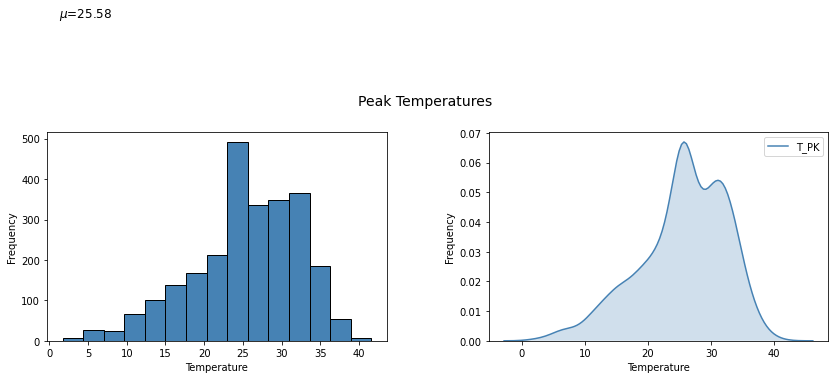

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns 
fig = plt.figure(figsize = (14,4))
title = fig.suptitle("Peak Temperatures", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

# Plotting the Histogram
ax = fig.add_subplot(1,2, 1)
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(df['T_PK'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['T_PK'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)
#PLotting the density plot 
# Density Plot
ax1 = fig.add_subplot(1,2, 2)
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Frequency") 
sns.kdeplot(df['T_PK'], ax=ax1, shade=True, color='steelblue')


Peak Wind speed plots:


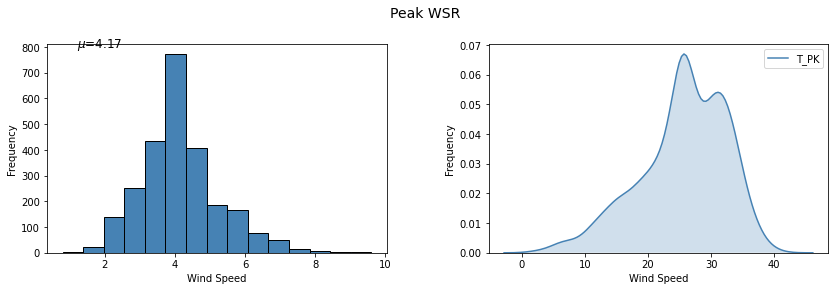

In [79]:
fig = plt.figure(figsize = (14,4))
title = fig.suptitle("Peak WSR", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

# PLotting the histogram
ax = fig.add_subplot(1,2, 1)
ax.set_xlabel("Wind Speed")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(df['WSR_PK'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['WSR_PK'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)


# PLotting the Density Plot
ax1 = fig.add_subplot(1,2, 2)
ax1.set_xlabel("Wind Speed")
ax1.set_ylabel("Frequency") 
sns.kdeplot(df['T_PK'], ax=ax1, shade=True, color='steelblue')

Correlation matrix Heatmap

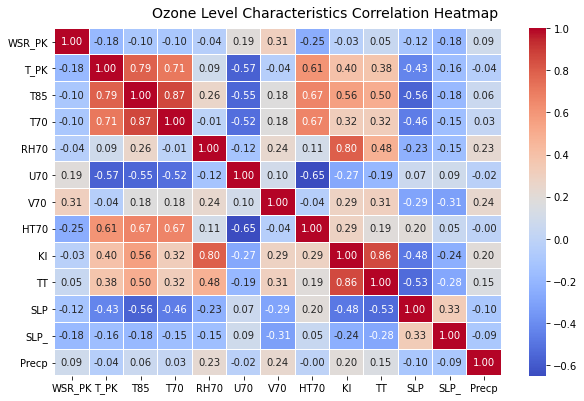

In [80]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
subset_attributes = ['WSR_PK','T_PK','T85','T70','RH70','U70','V70','HT70','KI','TT','SLP','SLP_','Precp']
corr = df[subset_attributes].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Ozone Level Characteristics Correlation Heatmap', fontsize=14)

Factor plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


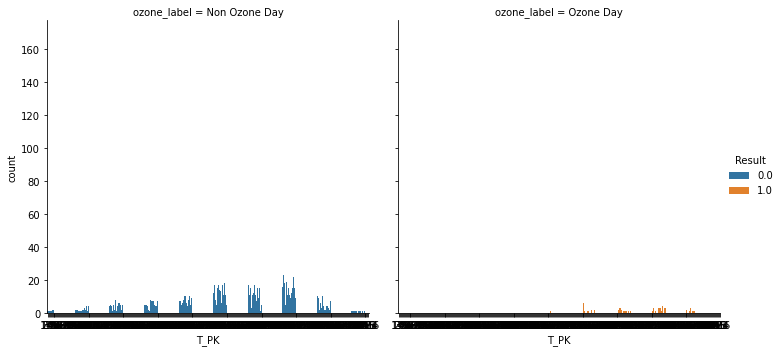

In [81]:

df['ozone_label'] = df['Result'].apply(lambda value: 'Non Ozone Day' if value == 0 else 'Ozone Day')
df['ozone_label'] = pd.Categorical(df['ozone_label'], categories=['Non Ozone Day', 'Ozone Day'])
# Visualizing 3-D categorical data using bar plots
# leveraging the concepts of hue and facets
fc = sns.factorplot(x="T_PK", hue="Result", col="ozone_label", 
                    data=df, kind="count")

# Considering three models for prediction : 

# 1) Support Vector Machine(SVM)


In [82]:
from sklearn import svm 
#Using linear kernel
clf =svm.SVC(kernel = 'linear')
#Fitting the model 
clf.fit(X_train,y_train)
#Obtaining the predicted values
y_pred  = clf.predict(X_test)

#Evaluating the model
from sklearn import metrics
from sklearn.metrics import accuracy_score
#Getting the accuracy of the model
print("The accuracy is {}".format(accuracy_score(y_test,y_pred)))



The accuracy is 0.9400630914826499


# 2)KNearestNeighbors(KNN)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =5)
#Fitting the model 
knn.fit(X_train,y_train)
#Getting the predictions
y_pred = knn.predict(X_test)

#Evaluating the model
print("The accuracy is {}".format(accuracy_score(y_test,y_pred)))


The accuracy is 0.9369085173501577


# 3) Deep Neural Network (DNN)

In [85]:
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization



Normalizing the data and converting it into a Gaussian distribution

In [60]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Initialising the initializer which generates the  tensord with a normal distribution
initializer = keras.initializers.RandomNormal(mean =0.0 ,  stddev = 0.05, seed =42)
#Defining the model 
model = Sequential()
model.add(Dense(100, kernel_initializer=initializer, input_dim=72, activation= "relu"))
model.add(BatchNormalization())
model.add(Dense(50, kernel_initializer=initializer, activation= "relu"))
model.add(BatchNormalization())
model.add(Dense(1, kernel_initializer=initializer, activation= "sigmoid")) 

#Getting the summary of the model
model.summary()

#Getting the cross entropy loss of the model and setting the optimizer 
#adam = keras.optimizers.Adam(lr= 0.001, beta_1 =0.9, beta_2 = 0.999, epsilon =None, decay= 0.0 ,amsgrad= False)



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               7300      
_________________________________________________________________
batch_normalization_11 (Batc (None, 100)               400       
_________________________________________________________________
dense_17 (Dense)             (None, 50)                5050      
_________________________________________________________________
batch_normalization_12 (Batc (None, 50)                200       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 51        
Total params: 13,001
Trainable params: 12,701
Non-trainable params: 300
_________________________________________________________________


In [64]:
#Compiling the model 
model.compile(loss="binary_crossentropy" , optimizer='adam', metrics=["accuracy"])
fitted_model = model.fit(X_train, y_train, validation_split=0.25, epochs=10, verbose=1)

Train on 1425 samples, validate on 475 samples
Epoch 1/10
1425/1425 [==============================] - 0s 335us/step - loss: 0.0845 - accuracy: 0.9684 - val_loss: 0.2056 - val_accuracy: 0.9389
Epoch 2/10
1425/1425 [==============================] - 0s 69us/step - loss: 0.0803 - accuracy: 0.9719 - val_loss: 0.1944 - val_accuracy: 0.9305
Epoch 3/10
1425/1425 [==============================] - 0s 66us/step - loss: 0.0758 - accuracy: 0.9733 - val_loss: 0.2097 - val_accuracy: 0.9263
Epoch 4/10
1425/1425 [==============================] - 0s 68us/step - loss: 0.0661 - accuracy: 0.9754 - val_loss: 0.2420 - val_accuracy: 0.9221
Epoch 5/10
1425/1425 [==============================] - 0s 66us/step - loss: 0.0617 - accuracy: 0.9775 - val_loss: 0.2299 - val_accuracy: 0.9347
Epoch 6/10
1425/1425 [==============================] - 0s 67us/step - loss: 0.0519 - accuracy: 0.9832 - val_loss: 0.2244 - val_accuracy: 0.9263
Epoch 7/10
1425/1425 [==============================] - 0s 67us/step - loss: 0.054

Hence accuracy obtained after 8 epochs is 97.9% and validation_accuracy is 94.1%